Sample of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


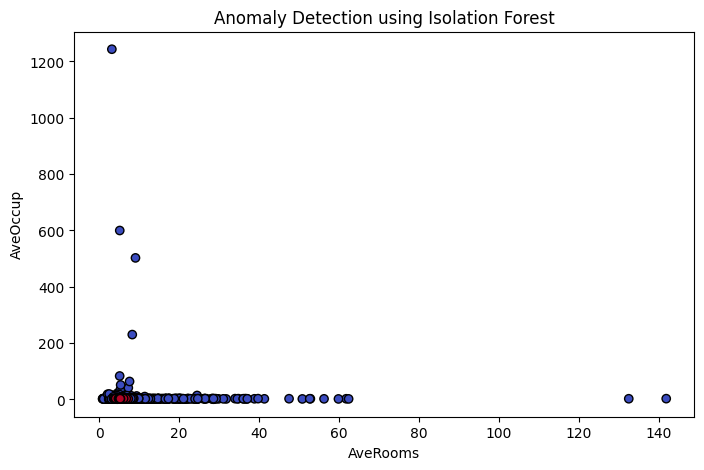

Anomaly counts (contamination=0.1):
anomaly
 1    18576
-1     2064
Name: count, dtype: int64

--- Anomaly Counts by Contamination Level ---
Contamination=0.01: Anomalies=207
Contamination=0.05: Anomalies=1032
Contamination=0.1: Anomalies=2064
Contamination=0.2: Anomalies=4128
Functional test passed.


...
----------------------------------------------------------------------
Ran 3 tests in 0.017s

OK


In [1]:
# Install required package if not already installed
try:
    import sklearn
except ImportError:
    print("scikit-learn not found. Run: pip install scikit-learn")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import IsolationForest
import unittest

# Load dataset with error handling
def load_dataset():
    try:
        data = fetch_california_housing()
        X = pd.DataFrame(data.data, columns=data.feature_names)
        print("Sample of the dataset:")
        print(X.head())
        return X
    except Exception as e:
        print("Failed to load dataset:", e)
        return pd.DataFrame()

# Run Isolation Forest and return predictions + scores
def run_isolation_forest(data, contamination=0.1, random_state=42):
    try:
        if not isinstance(data, pd.DataFrame):
            raise ValueError("Input must be a DataFrame.")
        if data.empty:
            raise ValueError("Input data is empty.")
        model = IsolationForest(contamination=contamination, random_state=random_state)
        model.fit(data)
        preds = model.predict(data)
        scores = model.decision_function(data)
        return preds, scores
    except Exception as e:
        print(f"Isolation Forest error: {e}")
        return None, None

# Plot anomalies
def plot_anomalies(data, feature1, feature2, label_col='anomaly'):
    try:
        plt.figure(figsize=(8, 5))
        plt.scatter(data[feature1], data[feature2], c=data[label_col], cmap='coolwarm', edgecolor='k')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title('Anomaly Detection using Isolation Forest')
        plt.show()
    except Exception as e:
        print(f"Plotting error: {e}")

# Unit Tests
class TestIsolationForest(unittest.TestCase):
    def test_data_not_empty(self):
        self.assertFalse(X.empty)
    def test_anomaly_column_exists(self):
        self.assertIn('anomaly', X.columns)
    def test_anomaly_label_values(self):
        self.assertTrue(set(X['anomaly']).issubset({-1, 1}))

# Main routine
def main():
    global X  # Needed for unittest to access
    X = load_dataset()
    if not X.empty:
        preds, scores = run_isolation_forest(X, contamination=0.1)
        if preds is not None:
            X['anomaly'] = preds
            X['anomaly_score'] = scores
            plot_anomalies(X, 'AveRooms', 'AveOccup')
            print("Anomaly counts (contamination=0.1):")
            print(X['anomaly'].value_counts())

            # Try multiple contamination levels
            print("\n--- Anomaly Counts by Contamination Level ---")
            for contamination in [0.01, 0.05, 0.1, 0.2]:
                preds_temp, _ = run_isolation_forest(X.drop(columns=['anomaly', 'anomaly_score']), contamination)
                if preds_temp is not None:
                    print(f"Contamination={contamination}: Anomalies={sum(preds_temp == -1)}")

            # Run simple test on prediction function
            def test_run_isolation_forest():
                test_data = X.drop(columns=['anomaly', 'anomaly_score']).copy()
                preds, _ = run_isolation_forest(test_data, contamination=0.05)
                assert preds is not None and len(preds) == len(test_data)
                assert set(preds).issubset({-1, 1})
                print("Functional test passed.")
            test_run_isolation_forest()

            # Run unittest
            unittest.main(argv=[''], exit=False)

# Execute main
if __name__ == "__main__":
    main()
